Submission for Question 5 ( Part 2 )

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Define the kernel function
def kernel(x1, x2, l):
    return np.exp(-np.square(x1 - x2)/(l ** 2))


In [ ]:
# Generate inputs and outputs
N = 100
X = np.linspace(0, 4 * np.pi, N).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, np.sqrt(0.05), size=(N, 1))

In [ ]:
# Define the kernel parameters
l_values = [0.2, 0.5, 1, 2, 10]
rho = 1

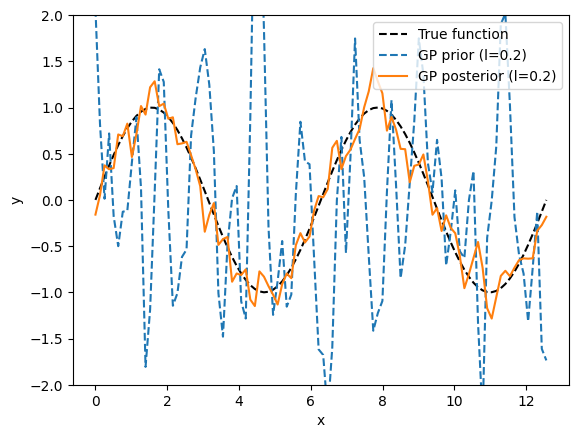

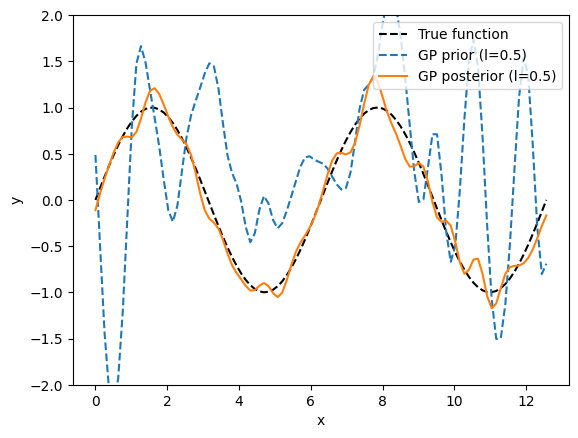

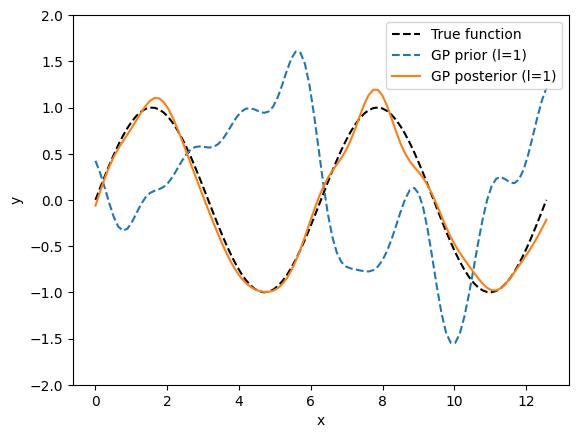

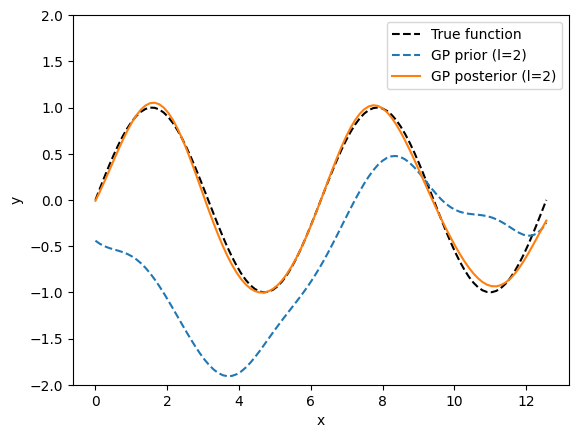

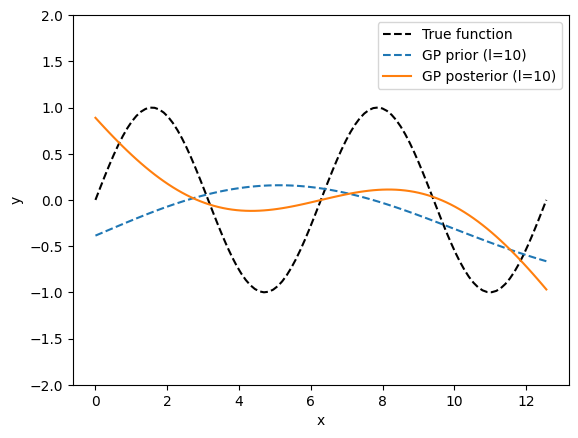

In [ ]:
for l in l_values:

    # Plot the true function
    y_plot = np.sin(X).reshape(-1, 1)
    plt.plot(X, y_plot, 'k--', label='True function')

    # Compute the covariance matrix based on the kernel function
    K = kernel(X, X.T, l)

    #Computing the mean of the Gaussian Posterior
    sigma = 0.05
    mu_post = (sigma) * np.eye(N)
    mu_post = mu_post + K
    mu_post = np.linalg.inv(mu_post)
    mu_post = np.matmul(K, mu_post)
    mu_post = np.dot(mu_post, y)

    # Draw a random sample from the GP prior
    f_prior = np.random.multivariate_normal(np.zeros(N), kernel(X, X.T, l), size=1).T

    # Plot the GP prior, posterior mean, and true function
    plt.plot(X, f_prior, '--', label=f'GP prior (l={l})')
    plt.plot(X, mu_post, label=f'GP posterior (l={l})')

    # plt.fill_between(x_plot.ravel(), mu_post.ravel() - 1.96 * np.sqrt(np.diag(cov_post)), mu_post.ravel() + 1.96 * np.sqrt(np.diag(cov_post)), alpha=0.2)
    # Add labels and legend to the plot
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim([-2, 2])
    plt.legend(loc='upper right')
    plt.savefig("P5_l" + str(l) + ".png")  # Save the plot
    plt.show()

# New section